# Nettoyage de données et pré-traitement des textes


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('../src')  # Add the src folder to the module search path
from utils import Utils

In [13]:
all_data = pd.read_csv('D:/openclassroom/projet7/input/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1', names=["target", "id", "date", "flag", "user", "text"])

In [14]:
all_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
all_data.shape

(1600000, 6)

In [16]:
# Drop useless columns
all_data.drop(columns=["id", "date", "flag", "user"], inplace=True)


In [17]:
all_data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [18]:
labels = all_data['target'].unique()
print(labels)

[0 4]


In [19]:
# Replace target values with labels
all_data.target = all_data.target.map(
    {
        0: "NEGATIVE",
        4: "POSITIVE",
    }
)

['NEGATIVE' 'POSITIVE']


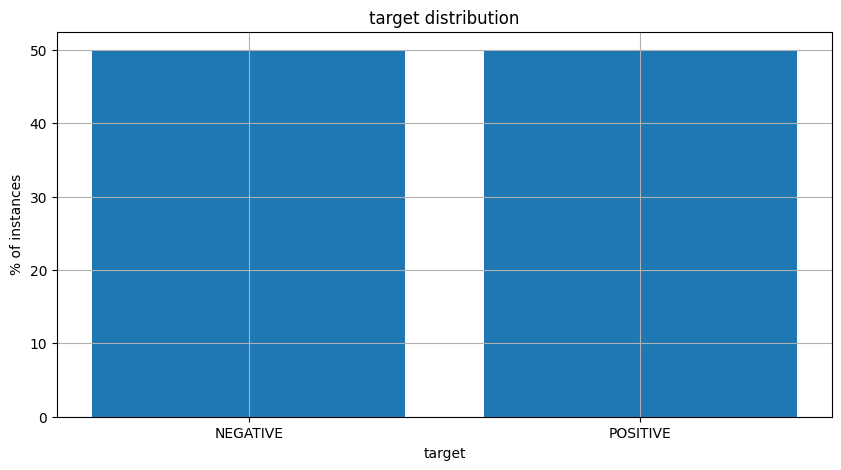

In [20]:
# the histogram of the data
labels = all_data['target'].unique()
print(labels)
post_total = len(all_data)
df1 = all_data.groupby(['target']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('target')
plt.title('target distribution')
plt.grid(True)
plt.show()

## Prétraitement de texte


# remove special characters
def remove_special_characters(texts):
    #Removing numerical values, Removing Digits and words containing digits
    l_texts= texts.apply(lambda x: re.sub('\w*\d\w*','', x))
    #Removing punctations
    l_texts= l_texts.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
    #Removing Extra Spaces
    l_texts = l_texts.apply(lambda x: re.sub(' +', ' ',x))
    # remove stock market tickers like $GE
    l_texts = l_texts.apply(lambda x: re.sub(r'\$\w*', '',x))
    # remove old style retweet text "RT"
    l_texts = l_texts.apply(lambda x: re.sub(r'^RT[\s]+', '',x))
    # remove hyperlinks
    l_texts = l_texts.apply(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '',x))
    # remove hashtags
    # only removing the hash # sign from the word
    l_texts = l_texts.apply(lambda x: re.sub(r'#', '',x))

    return l_texts

def tokenize_stopwords_lemmatize(texts, allowed_postags=['NOUN','ADJ','ADV']):
    tokenized_docs = texts.apply(lambda x: ' '.join([token.lemma_.lower() for token in list(nlp(x)) if token.is_alpha and not token.is_stop]))
    return tokenized_docs

In [21]:
texts = Utils.remove_special_characters(all_data.text)
tokenized_docs = Utils.tokenize_stopwords_lemmatize(texts)
print(tokenized_docs)

0          switchfoot httptwitpiccom awww s bummer should...
1          upset not update facebook texte cry result sch...
2             kenichan dive time ball manage save rest bound
3                                  body feel itchy like fire
4                           nationwideclass behave m mad not
                                 ...                        
1599995                        wake have school good feeling
1599996    thewdbcom cool hear old walt interview httpblipfm
1599997                       ready mojo makeover ask detail
1599998      happy birthday boo alll time tupac amaru shakur
1599999          happy charitytuesday thenspcc sparkscharity
Name: text, Length: 1600000, dtype: object


In [ ]:
all_data = all_data.dropna()
print(all_data.shape)

In [14]:
df_cleaned_docs = all_data.copy()
df_cleaned_docs['clean_text'] = tokenized_docs
df_cleaned_docs.head()

,target,text,text_tokenized
0,NEGATIVE,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom awww s bummer should...
1,NEGATIVE,is upset that he can't update his Facebook by ...,upset not update facebook texte cry result sch...
2,NEGATIVE,@Kenichan I dived many times for the ball. Man...,kenichan dive time ball manage save rest bound
3,NEGATIVE,my whole body feels itchy and like its on fire,body feel itchy like fire
4,NEGATIVE,"@nationwideclass no, it's not behaving at all....",nationwideclass behave m mad not


In [16]:
df_cleaned_docs.to_csv('D:/openclassroom/projet7/input/df_cleaned_docs.csv',index=False)